### Explore mixed layer and perfrom linear regression

#### ML was sliced in inidivual cast processing (22-23.3) and then refined by taking average O2 and beam transmission CTD values within that range (between 0-46 m depth). For each cast, these were arranged in an Excel sheet. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import style
import datetime
from sklearn.linear_model import LinearRegression


import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [2]:
cd ~/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804/

/home/millieginty/Documents/git-repos/2017-etnp/data/ctd-cnv/RR1804


In [4]:
p2_ml = pd.read_csv("p2_2018_ml_mean.csv", parse_dates = ['StartTime'])

p2_ml = p2_ml.set_index('StartTime')

# rename oxygen so there's no backslash
p2_ml.rename(columns = {'sbox0Mm/Kg':'sbox0MmKg'}, inplace = True)

p2_ml.head()

,Cast,CStarTr0,sbox0MmKg
StartTime,,,
2018-04-15 05:12:33,42,4.532700,201.066500
2018-04-15 15:06:02,43,4.532579,202.785744
2018-04-15 22:01:43,44,4.507766,205.200244
2018-04-16 15:03:02,45,4.531167,201.298519
2018-04-17 15:03:16,46,4.530633,201.452296


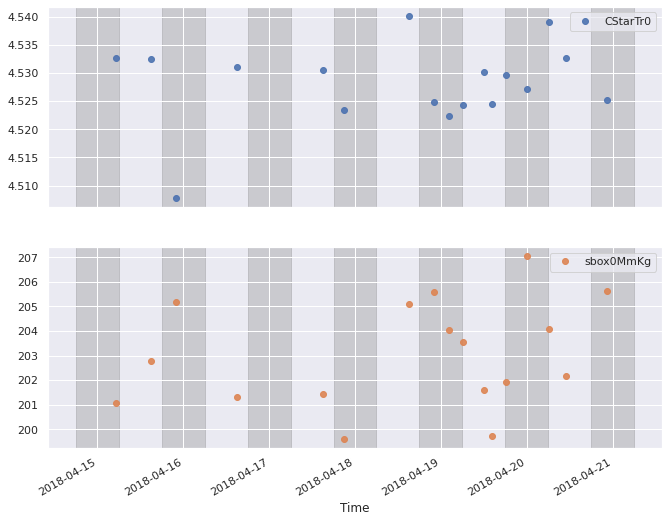

In [5]:
# Visualize the time series


# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# Plot O2
cols_plot = ['CStarTr0', 'sbox0MmKg']

axes = p2_ml[cols_plot].plot(marker='o', alpha=0.9, linestyle='None', figsize=(11, 9), subplots=True, \
                              sharex = True, sharey = False)
for ax in axes:
    ax.set_ylabel('')
    ax.set_xlabel('Time')
    
    
for ax in axes:
    ax.axvspan('2018-04-14 18-00-00','2018-04-15 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-15 18-00-00','2018-04-16 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-16 18-00-00','2018-04-17 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-17 18-00-00','2018-04-18 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .3, zorder = -1)
    ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .3, zorder = -1)

model = LinearRegression()
#model.fit('StartTime', 'CStarTr0')

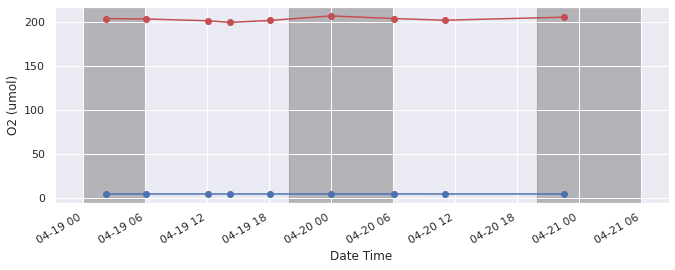

In [6]:
# Visualize the time series

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

# reshape the data
x = p2_ml.index.values.reshape(-1,1)
y = p2_ml.sbox0MmKg.values.reshape(-1,1)

model = LinearRegression()
model.fit(x, y)

ax = p2_ml.loc['2018-04-19':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')
ax = p2_ml.loc['2018-04-19':'2018-04-20', 'CStarTr0'].plot(marker='o', color = 'b', linestyle='-')
#ax = p2_ml.loc['2018-04-19':'2018-04-20', 'flSP'].plot(marker='o', color = 'g', linestyle='-')

### Shade in sundown to sunup

# 20%-grey rectangle spanning the x axis width from the nighttime hours
ax.axvspan('2018-04-19 00-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 20-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 20-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

### Trying to get regression model plotted

#x_new = np.linspace('2018-04-23 00-00-00', '2018-04-23 06-00-00')
#y_new = model.predict(x_new[:, np.newaxis])

#print(regression.predict([[2018-4-22]]))

#x_new = 2018-4-22
#y_new = regression.predict([[2018-4-22]])
#y_new = 1.3

#ax.plot(x_new, y_new)

ax.set_xlabel('Date Time')
ax.set_ylabel('O2 (umol)')

ax.axis('tight')

plt.show()

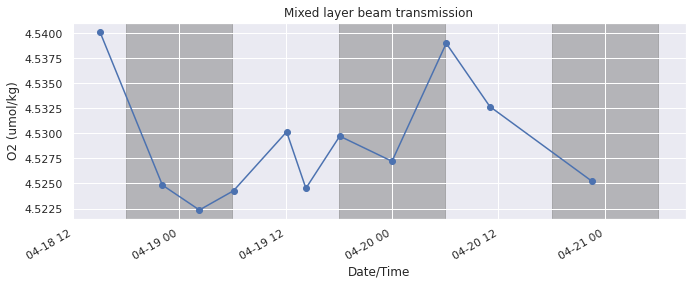

In [11]:
ax = p2_ml.loc['2018-04-18':'2018-04-20', 'CStarTr0'].plot(marker='o', color = 'b', linestyle='-')

ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

ax.set_xlabel('Date/Time')
ax.set_ylabel('O2 (umol/kg)')
ax.set_title('Mixed layer beam transmission');

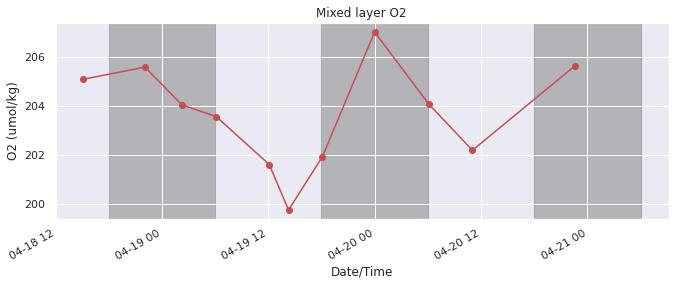

In [12]:
ax = p2_ml.loc['2018-04-18':'2018-04-20', 'sbox0MmKg'].plot(marker='o', color = 'r', linestyle='-')

ax.axvspan('2018-04-18 18-00-00','2018-04-19 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-19 18-00-00','2018-04-20 06-00-00',color = 'gray', alpha = .5, zorder = -1)
ax.axvspan('2018-04-20 18-00-00','2018-04-21 06-00-00',color = 'gray', alpha = .5, zorder = -1)

ax.set_xlabel('Date/Time')
ax.set_ylabel('O2 (umol/kg)')
ax.set_title('Mixed layer O2');